In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.data', names =['Sample code number',
'Clump Thickness',
'Uniformity of Cell Size',
'Uniformity of Cell Shape',
'Marginal Adhesion',
'Single Epithelial Cell Size',
'Bare Nuclei',
'Bland Chromatin',
'Normal Nucleoli', 
'Mitoses',
'Class'])

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [7]:
data['Bare Nuclei'] = data['Bare Nuclei'].replace({'?' : np.nan})

In [8]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', nan, '5', '8', '6'],
      dtype=object)

In [9]:
data['Bare Nuclei'].isnull().sum()

16

In [10]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('float64')

Replacing the missing values with mean as the missing values account to about 2.28 percent of the entire dataset.

In [11]:
data['Bare Nuclei'].fillna(data['Bare Nuclei'].mean(), inplace = True)

In [12]:
data['Bare Nuclei'].unique()

array([ 1.        , 10.        ,  2.        ,  4.        ,  3.        ,
        9.        ,  7.        ,  3.54465593,  5.        ,  8.        ,
        6.        ])

In [13]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64')

In [14]:
data['Bare Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number             699 non-null int64
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


Splitting the dataset into attributes and labels

In [16]:
le = LabelEncoder()

In [17]:
data['Class'] = le.fit_transform(data['Class'])

In [18]:
X = data.drop(['Class'], axis= 1)

In [19]:
y= data['Class']

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [21]:
scaler = MinMaxScaler()

In [22]:
X = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =  0 , test_size = 0.3)

Now building Linear SVM model using the training dataset

In [24]:
linearsvm = LinearSVC(max_iter = 40000)
model = linearsvm.fit(X_train, y_train)

In [25]:
y_predict = model.predict(X_test)

In [51]:
metrics.accuracy_score(y_test, y_predict)

0.9523809523809523

In [52]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       135
           1       0.92      0.95      0.93        75

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



In [53]:
metrics.accuracy_score(y_test, y_predict)

0.9523809523809523

Now building a model for Polynomial SVM 

In [174]:
polysvm = SVC(C = 0.1, gamma = 'scale', kernel = 'poly', degree = 3)
modelpoly = polysvm.fit(X_train, y_train)

In [175]:
y_pred = modelpoly.predict(X_test)

In [176]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       135
           1       0.93      0.95      0.94        75

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [177]:
metrics.accuracy_score(y_test, y_pred)

0.9571428571428572

Drawing bar plot to compare the classification report from the linear svm model and polynomial svm model

In [178]:
labels = ['Precision', 'Recall', 'F1-score', 'Accuracy']
linear_svm_points = [round(metrics.precision_score(y_test, y_predict),2), 
                     round(metrics.recall_score(y_test, y_predict),2), 
                     round(metrics.f1_score(y_test, y_predict),2), 
                     round(metrics.accuracy_score(y_test, y_predict),2)]
poly_svm_points = [round(metrics.precision_score(y_test, y_pred),2), 
                     round(metrics.recall_score(y_test, y_pred),2), 
                     round(metrics.f1_score(y_test, y_pred),2), 
                     round(metrics.accuracy_score(y_test, y_pred),2)]



In [179]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

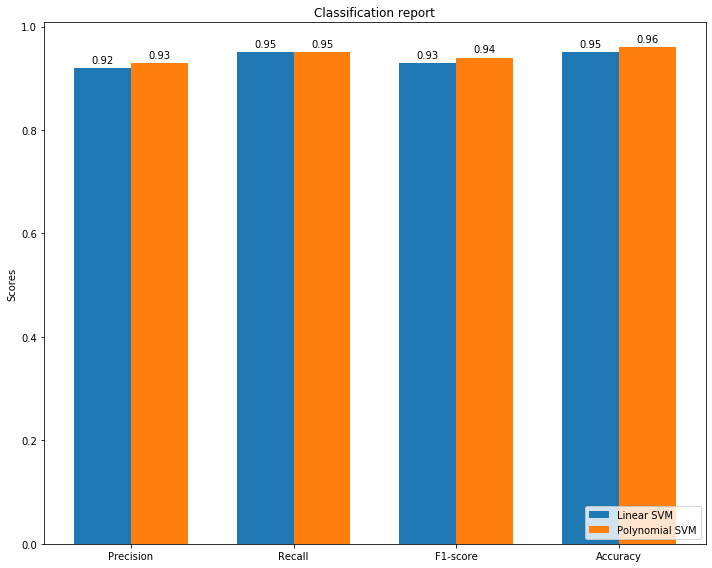

In [183]:
fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, linear_svm_points, width, label='Linear SVM')
rects2 = ax.bar(x + width/2, poly_svm_points, width, label='Polynomial SVM')

ax.set_ylabel('Scores')
ax.set_title('Classification report')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc ='lower right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

The accuracy, f1-score and precision for Polynomial svm is slightly higher than linear svm. The recall is same for both the models